In [ ]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount("/content/drive")
    !pip install datasets transformers bertopic umap hdbscan openai -U -qq
    base_folder = Path("/content/drive/MyDrive/NLP")
else:
    pass

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 65.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.9/221.9 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (se

In [ ]:
import pandas as pd
from datasets import *
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import textwrap
import torch
torch.cuda.is_available()
import seaborn as sns

In [ ]:
# !pip3 install datasets

In [ ]:
def print_wrap(text, width=80):
    """
    Prints the given text, wrapping lines to a maximum of the specified width (default is 80 characters).

    Args:
    text (str): The text to be printed.
    width (int): The maximum width of a line, in characters.
    """
    wrapper = textwrap.TextWrapper(width=width)
    wrapped_text = wrapper.fill(text)
    print(wrapped_text)

In [ ]:
model_folder = base_folder/'models'
model_folder.mkdir(exist_ok=True, parents=True)

In [ ]:
df = load_dataset('csv', data_files = str(base_folder/'titles_cleaned(1).csv'))

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
selected_columns = {
    'url': df['train']['url'],
    'title': df['train']['title'],
    'claps': df['train']['claps'],
    'responses': df['train']['responses'],
    'readTime': df['train']['readTime'],
    '$oid': df['train']['$oid'],
    '$date': df['train']['$date'],
    'datetime': df['train']['datetime'],
    'year': df['train']['year'],
    'month': df['train']['month'],
    'date': df['train']['date'],
    'hour': df['train']['hour'],
    'minute': df['train']['minute'],
    'second': df['train']['second']
}

# Cnew dataset
df = Dataset.from_dict(selected_columns)

In [ ]:
col = ['claps', 'responses', 'year', 'month', 'date', 'hour', 'minute', 'second']
df = df.cast_column('claps', Value("int32"))
df = df.cast_column('responses', Value("int32"))
df = df.cast_column('year', Value("int32"))
df = df.cast_column('month', Value("int32"))
df = df.cast_column('date', Value("int32"))
df = df.cast_column('hour', Value("int32"))
df = df.cast_column('minute', Value("int32"))
df = df.cast_column('second', Value("int32"))

Casting the dataset:   0%|          | 0/28383 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/28383 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/28383 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/28383 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/28383 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/28383 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/28383 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/28383 [00:00<?, ? examples/s]

**Sentence Embeddings**

In [ ]:
yr = df["year"]
title_text = df["title"]

In [ ]:
embedding_model = SentenceTransformer('all-mpnet-base-v2')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
embeddings_1 = embedding_model.encode(title_text)

In [ ]:
embeddings_1.shape

(28383, 768)

**Dimensionality reduction**

In [ ]:
umap_model = UMAP(n_neighbors=15, n_components=10, min_dist=0.0, metric='cosine', random_state=42)

reduced_embeddings = umap_model.fit_transform(embeddings)

**Clustering**

In [ ]:
# We instantiate our HDBSCAN model
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom')

# We fit our model and extract the cluster labels
hdbscan_model.fit(reduced_embeddings)
hdbscan_clusters = hdbscan_model.labels_

In [ ]:
hdbscan_clusters

array([-1, -1, 77, ..., 94, -1,  8])

In [ ]:
import numpy as np

<Axes: xlabel='x', ylabel='y'>

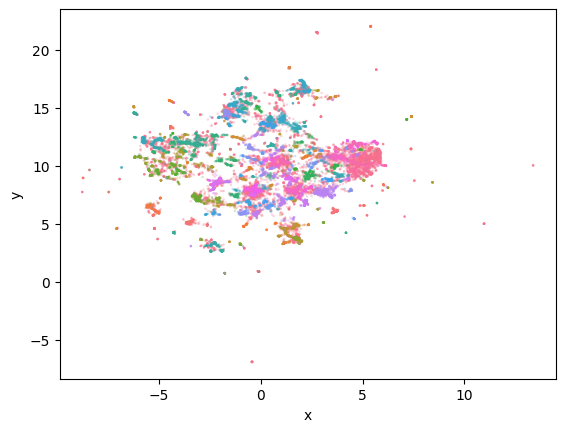

In [ ]:
# Reduce 768-dimensional embeddings to 2 dimensions for easier visualization
reduced_embeddings_2 = UMAP(n_neighbors=15, n_components=2,
min_dist=0.0, metric='cosine').fit_transform(embeddings)
df = pd.DataFrame(np.hstack([reduced_embeddings_2, clusters.reshape(-1, 1)]),
     columns=["x", "y", "cluster"]).sort_values("cluster")

# Visualize clusters
df.cluster = df.cluster.astype(int).astype(str)
sns.scatterplot(data=df, x='x', y='y', hue='cluster',
   linewidth=0, legend=False, s=3, alpha=0.3)

In [ ]:
df = pd.DataFrame(np.hstack([clusters.reshape(-1, 1), np.array(title_text).reshape(-1,1)]),
                  columns=["cluster", "title"]).sort_values("cluster")

In [ ]:
unique_clusters = np.unique(clusters)
unique_clusters.shape

(327,)

**Count Vectorizer**

In [ ]:
vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))

In [ ]:
# Step 1
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Step 2
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

# Step 3
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Step 4
vectorizer_model = CountVectorizer(stop_words="english")

# Step 5
ctfidf_model = ClassTfidfTransformer()

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

**Part A: Initial BERTopic Analysis**

In [ ]:
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,
  calculate_probabilities=True
)
topics, probs = topic_model.fit_transform(title_text)

In [ ]:
topics[0], probs[0]

(-1,
 array([0.01581518, 0.00055129, 0.00049147, 0.0002981 , 0.00038009,
        0.00045939, 0.000362  , 0.00051873, 0.00059318, 0.00050468,
        0.00045721, 0.00062774, 0.00069441, 0.00057199, 0.0009433 ,
        0.00040988, 0.0008757 , 0.00039303, 0.00397424, 0.0005083 ,
        0.00081361, 0.00046314, 0.00030257, 0.00042873, 0.00049578,
        0.00039528, 0.00036885, 0.00122237, 0.00045719, 0.00033338,
        0.00043552, 0.00119655, 0.00038896, 0.00040532, 0.00054845,
        0.00038117, 0.00046252, 0.0003775 , 0.00047461, 0.00041907,
        0.00044437, 0.00046735, 0.00047293, 0.00054474, 0.00045207,
        0.00053764, 0.00057891, 0.00030991, 0.00050164, 0.00051791,
        0.00045865, 0.00385624, 0.0009939 , 0.0004431 , 0.00043521,
        0.00051748, 0.0010138 , 0.00046555, 0.00098111, 0.00047613,
        0.00049694, 0.00067732, 0.00041987, 0.00043865, 0.00054869,
        0.00034811, 0.00047379, 0.00054777, 0.00037437, 0.00550552,
        0.00050484, 0.00057847, 0.00051104,

In [ ]:
topic_model.get_topic_info().head(20)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9436,-1_product_design_ai_business,"[product, design, ai, business, medium, ux, ma...",[10 powerful ways to use ChatGPT as a product ...
1,0,455,0_chatgpt_prompts_chat_prompt,"[chatgpt, prompts, chat, prompt, use, gpt, rep...","[How to use ChatGPT-4 for FREE!, ChatGPT Promp..."
2,1,416,1_seo_search_engine_sem,"[seo, search, engine, sem, ranking, rank, keyw...",[Search Engine Marketing (SEM): What It Is And...
3,2,387,2_data_analyst_science_engineering,"[data, analyst, science, engineering, scientis...",[3 Projects You Need in Your Data Science Port...
4,3,368,3_linkedin_profile_leads_recruiters,"[linkedin, profile, leads, recruiters, posting...","[20 LinkedIn Post Ideas to Grow on LinkedIn, H..."
5,4,315,4_social_media_management_platforms,"[social, media, management, platforms, marketi...",[The Power of Social Media: How to Use it for ...
6,5,272,5_ads_google_adwords_campaign,"[ads, google, adwords, campaign, ad, adsense, ...",[Google Ads Tutorial: Profitable Google Ads Ca...
7,6,267,6_instagram_followers_algorithm_grow,"[instagram, followers, algorithm, grow, accoun...","[How to grow your Instagram in 2023, System de..."
8,7,262,7_writing_writer_write_writers,"[writing, writer, write, writers, articles, co...","[4 Ways to Become a Better Writer, How to beco..."
9,8,260,8_apple_apps_mac_productivity,"[apple, apps, mac, productivity, iphone, pro, ...",[Apple’s Vision Pro is a Reality Already — an...


**Interpretation of output**

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9436,-1_product_design_ai_business,"[product, design, ai, business, medium, ux, ma...",[10 powerful ways to use ChatGPT as a product ...
1,0,455,0_chatgpt_prompts_chat_prompt,"[chatgpt, prompts, chat, prompt, use, gpt, rep...","[How to use ChatGPT-4 for FREE!, ChatGPT Promp..."
2,1,416,1_seo_search_engine_sem,"[seo, search, engine, sem, ranking, rank, keyw...",[Search Engine Marketing (SEM): What It Is And...
3,2,387,2_data_analyst_science_engineering,"[data, analyst, science, engineering, scientis...",[3 Projects You Need in Your Data Science Port...
4,3,368,3_linkedin_profile_leads_recruiters,"[linkedin, profile, leads, recruiters, posting...","[20 LinkedIn Post Ideas to Grow on LinkedIn, H..."
...,...,...,...,...,...
309,308,15,308_retirement_aftershocks_early_visiting,"[retirement, aftershocks, early, visiting, ret...","[$4 Million Early Retirement? Not Easy, But He..."
310,309,15,309_mlops_monitoring_model_deployment,"[mlops, monitoring, model, deployment, 4b, bin...",[MLOps project — part 4b: Machine Learning Mod...
311,310,15,310_month_payout_10k_400,"[month, payout, 10k, 400, 000, 32k, electrical...",[How to Make 10k a Month — 5Ways to Make 10k i...
312,311,15,311_flemm_adaptive_roland_squads,"[flemm, adaptive, roland, squads, tribes, team...",[How Adaptive are Team Topologies? - Roland Fl...


In [ ]:
topic_model.get_topic(0)

[('chatgpt', 0.06670353257741474),
 ('prompts', 0.02780645258226798),
 ('chat', 0.01562085044406692),
 ('prompt', 0.014770155989745331),
 ('use', 0.012628782525188188),
 ('gpt', 0.008699742052426324),
 ('replace', 0.008492368166232925),
 ('interpreter', 0.007920159151761308),
 ('awesome', 0.007887727322450657),
 ('coder', 0.007500102305185145)]

In [ ]:
topic_model.visualize_distribution(probs[0])

In [ ]:
topic_distr, _ = topic_model.approximate_distribution(title_text)
topic_model.visualize_distribution(topic_distr[0])

**Interactive Visualizations**

In [ ]:
# Calculate the topic distributions on a token-level
topicdistr, topic_dist_token = topic_model.approximate_distribution(title_text, calculate_tokens=True)

# Visualize the token-level distributions
topic_dist= topic_model.visualize_approximate_distribution(title_text[3], topic_dist_token[3])
topic_dist

,Google,Generative,AI,Updates,Will,Shatter,Organic,SEO,and,Marketing,Pipeline
1_seo_search_engine_sem,0.000,0.000,0.000,0.000,0.000,0.000,0.158,0.373,0.373,0.373,0.215
39_marketing_mouth_funky_plan,0.000,0.000,0.000,0.000,0.000,0.000,0.157,0.157,0.157,0.157,0.000
56_generative_ai_extractive_landscape,0.361,0.725,0.725,0.725,0.364,0.000,0.000,0.000,0.000,0.000,0.000
125_traffic_organic_increase_website,0.000,0.000,0.000,0.000,0.000,0.000,0.209,0.209,0.209,0.209,0.000
127_presearch_weekly_caught_august,0.167,0.335,0.335,0.335,0.168,0.000,0.000,0.000,0.000,0.000,0.000
193_seo_visible_chatgpt_optimized,0.000,0.000,0.000,0.000,0.000,0.000,0.126,0.298,0.298,0.298,0.172
227_pipeline_pipelines_docs_bother,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.587,0.587,0.587,0.587
243_etl_pipeline_airflow_redshift,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.300,0.300,0.300,0.300
263_seo_rankings_boost_parasite,0.143,0.284,0.489,0.739,0.880,1.024,1.098,1.064,0.779,0.495,0.215
283_devops_ci_cd_deployment,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.140,0.140,0.140,0.140


In [ ]:
topics[3]

263

In [ ]:
topic_model.get_document_info(title_text)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,5 ChatGPT Prompts I Use to Write High-Ranking ...,-1,-1_product_design_ai_business,"[product, design, ai, business, medium, ux, ma...",[10 powerful ways to use ChatGPT as a product ...,product - design - ai - business - medium - ux...,0.792044,False
1,Generative search experience: the next step in...,1,1_seo_search_engine_sem,"[seo, search, engine, sem, ranking, rank, keyw...",[Search Engine Marketing (SEM): What It Is And...,seo - search - engine - sem - ranking - rank -...,0.043171,False
2,What Google’s Generative AI Announcement Means...,-1,-1_product_design_ai_business,"[product, design, ai, business, medium, ux, ma...",[10 powerful ways to use ChatGPT as a product ...,product - design - ai - business - medium - ux...,0.455417,False
3,Google’s Generative AI Updates Will Shatter Or...,263,263_seo_rankings_boost_parasite,"[seo, rankings, boost, parasite, shatter, orga...",[How AI SEO Tools Can Boost Your Organic Traff...,seo - rankings - boost - parasite - shatter - ...,1.000000,False
4,Will Generative AI Kill SEO? Here’s What an SE...,263,263_seo_rankings_boost_parasite,"[seo, rankings, boost, parasite, shatter, orga...",[How AI SEO Tools Can Boost Your Organic Traff...,seo - rankings - boost - parasite - shatter - ...,1.000000,False
...,...,...,...,...,...,...,...,...
28378,A Successful Freelance Copywriter Addresses th...,-1,-1_product_design_ai_business,"[product, design, ai, business, medium, ux, ma...",[10 powerful ways to use ChatGPT as a product ...,product - design - ai - business - medium - ux...,0.906863,False
28379,6 Engaging YouTube Thumbnail Design Ideas That...,-1,-1_product_design_ai_business,"[product, design, ai, business, medium, ux, ma...",[10 powerful ways to use ChatGPT as a product ...,product - design - ai - business - medium - ux...,0.816921,False
28380,What’s New in Next.js 14?,36,36_js_nextjs_13_dynamic,"[js, nextjs, 13, dynamic, app, routes, materia...",[How to Integrate Google Analytics on your Nex...,js - nextjs - 13 - dynamic - app - routes - ma...,0.360219,False
28381,ChatGPT Has Changed My Approach to Learning Ne...,0,0_chatgpt_prompts_chat_prompt,"[chatgpt, prompts, chat, prompt, use, gpt, rep...","[How to use ChatGPT-4 for FREE!, ChatGPT Promp...",chatgpt - prompts - chat - prompt - use - gpt ...,0.130471,False


**Conclusion**

confusion of Organic and AI Based SEO

> Indented block



> Indented block



In [ ]:
topic_model.visualize_topics()

**Hierarchical Clustering**

In [ ]:
from scipy.cluster import hierarchy as sch

hierarchical_topics = topic_model.hierarchical_topics(title_text)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 312/312 [00:06<00:00, 48.54it/s]


In [ ]:
# Save original representations
from copy import deepcopy
org_topic = deepcopy(topic_model.topic_representations_)

In [ ]:
def compare_topic_changes(new_model, original_topic_words, max_length=75, top_n_topics=10):


    for topic_id in range(top_n_topics):
        # Extract top 5 words per topic from the original and new models
        original_top_words = "_".join(word for word, _ in original_topic_words[topic_id][:5])
        new_top_words = "_".join(word for word, _ in new_model.get_topic(topic_id)[:5])

        # Calculate whitespace for alignment
        alignment_spaces = " " * (max_length - len(original_top_words))

        # Print 'before' and 'after' topic word changes
        print(f"Topic: {topic_id}    {original_top_words}{alignment_spaces} >>     {new_top_words}")

**Part B: KeyBERTInspired**

In [ ]:
# KeyBERTInspired
from bertopic.representation import KeyBERTInspired
representation_model = KeyBERTInspired()

# Update our topic representations
topic_model.update_topics(title_text, representation_model=representation_model)

In [ ]:
# Show topic differences
compare_topic_changes(topic_model, org_topic)

Topic: 0    chatgpt_prompts_chat_prompt_use                                             >>     chatgpt_prompts_prompt_chat_prompting
Topic: 1    seo_search_engine_sem_ranking                                               >>     seo_marketing_advertising_sem_google
Topic: 2    data_analyst_science_engineering_scientist                                  >>     data_projects_analyst_analytics_roadmap
Topic: 3    linkedin_profile_leads_recruiters_posting                                   >>     linkedin_tinder_startup_profile_freelance
Topic: 4    social_media_management_platforms_marketing                                 >>     marketing_advertising_social_twitter_promote
Topic: 5    ads_google_adwords_campaign_ad                                              >>     ads_advertising_adwords_campaigns_adsense
Topic: 6    instagram_followers_algorithm_grow_account                                  >>     instagram_followers_feed_marketing_growing
Topic: 7    writing_writer_write_writers_article

**Hierarchical Clustering**

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(title_text)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 312/312 [00:39<00:00,  7.86it/s]



Based on the diagram provided, it is evident that there are 312 significant clusters, while the remaining data points can be considered as outliers. To address this, let's employ a probability-based strategy to eliminate outliers and subsequently examine the distribution of the clusters.

**Outlier removal**

In [ ]:
outliers_topic_wo = topic_model.reduce_outliers(title_text, topics, probabilities=probs, strategy="probabilities")

In [ ]:
topic_model.update_topics(title_text, topics = outliers_topic_wo)

2023-12-16 03:23:17,326 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [ ]:
topic_model.get_topic_info().head(20)

,Topic,Count,Name,Representation,Representative_Docs
0,0,616,0_chatgpt_prompts_prompt_chat,"[chatgpt, prompts, prompt, chat, use, bard, gp...","[How to use ChatGPT-4 for FREE!, ChatGPT Promp..."
1,1,472,1_seo_search_engine_sem,"[seo, search, engine, sem, ranking, keywords, ...",[Search Engine Marketing (SEM): What It Is And...
2,2,455,2_data_analyst_science_engineering,"[data, analyst, science, engineering, engineer...",[3 Projects You Need in Your Data Science Port...
3,3,368,3_linkedin_profile_leads_recruiters,"[linkedin, profile, leads, recruiters, on, pos...","[20 LinkedIn Post Ideas to Grow on LinkedIn, H..."
4,4,405,4_social_media_marketing_platforms,"[social, media, marketing, platforms, manageme...",[The Power of Social Media: How to Use it for ...
5,5,377,5_ads_google_adwords_ad,"[ads, google, adwords, ad, campaign, bidding, ...",[Google Ads Tutorial: Profitable Google Ads Ca...
6,6,371,6_instagram_followers_grow_algorithm,"[instagram, followers, grow, algorithm, viral,...","[How to grow your Instagram in 2023, System de..."
7,7,352,7_writing_writer_write_writers,"[writing, writer, write, writers, articles, re...","[4 Ways to Become a Better Writer, How to beco..."
8,8,271,8_apple_apps_mac_productivity,"[apple, apps, mac, productivity, iphone, pro, ...",[Apple’s Vision Pro is a Reality Already — an...
9,9,262,9_copywriting_copy_copywriter_watkins,"[copywriting, copy, copywriter, watkins, benja...",[The 10 Best Website Copywriting Tips - This I...


**The outliers have come down to 650**

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(title_text)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 312/312 [00:05<00:00, 61.12it/s]


**Merging topics related to Women and dating with life of a women after 40**

In [ ]:
merge_topics = [[27, 0]]

topic_model.merge_topics(title_text, merge_topics)

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(title_text)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 311/311 [00:07<00:00, 40.38it/s]
